In [ ]:
!pip install tldextract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.3/93.3 kB 2.7 MB/s eta 0:00:00


In [ ]:
!pip install whois

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for whois: filename=whois-0.9.27-py3-none-any.whl size=30469 sha256=df687e6023e28e10aa7af5c4d6f376ada6d52deb96fd31a641ffaf7c7f73dee4
  Stored in directory: /root/.cache/pip/wheels/71/17/36/d62eb5bcc416650499a7259d584c11e4a778de5ce0e72a8dbf
Successfully built whois


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import tldextract
import urllib.parse
import requests
import re
import whois
import ssl
import socket
import unicodedata


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/dataset_phishing.csv")

In [ ]:
df

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,http://www.fontspace.com/category/blackletter,45,17,0,2,0,0,0,0,0,...,0,0,0,448,5396,3980,0,0,6,legitimate
11426,http://www.budgetbots.com/server.php/Server%20...,84,18,0,5,0,1,1,0,0,...,1,0,0,211,6728,0,0,1,0,phishing
11427,https://www.facebook.com/Interactive-Televisio...,105,16,1,2,6,0,1,0,0,...,0,0,0,2809,8515,8,0,1,10,legitimate
11428,http://www.mypublicdomainpictures.com/,38,30,0,2,0,0,0,0,0,...,1,0,0,85,2836,2455493,0,0,4,legitimate


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [ ]:
df["status"].value_counts()

legitimate    5715
phishing      5715
Name: status, dtype: int64

# Preprocessing

In [ ]:
df["status"] = df["status"].replace({"legitimate": 1, "phishing": 0})

In [ ]:
df.dropna(subset=['status'], inplace=True)


In [ ]:
x = df[['url',"status","tld_in_path","tld_in_subdomain"]]


In [ ]:
x

,url,status,tld_in_path,tld_in_subdomain
0,http://www.crestonwood.com/router.php,1,0,0
1,http://shadetreetechnology.com/V4/validation/a...,0,0,0
2,https://support-appleld.com.secureupdate.duila...,0,0,1
3,http://rgipt.ac.in,1,0,0
4,http://www.iracing.com/tracks/gateway-motorspo...,1,0,0
...,...,...,...,...
11425,http://www.fontspace.com/category/blackletter,1,0,0
11426,http://www.budgetbots.com/server.php/Server%20...,0,1,0
11427,https://www.facebook.com/Interactive-Televisio...,1,0,0
11428,http://www.mypublicdomainpictures.com/,1,0,0


Extract the domain name from the URL

In [ ]:
def extract_domain(url):
    return urllib.parse.urlparse(url).netloc
x['domain'] = x['url'].apply(extract_domain)

<ipython-input-18-58cee8d50632>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['domain'] = x['url'].apply(extract_domain)


Calculate the length of the URL

In [ ]:
def url_length(url):
    return len(url)
x['url_length'] = x['url'].apply(url_length)    

<ipython-input-19-10fb530cb754>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['url_length'] = x['url'].apply(url_length)


Count the number of subdomains in the URL

In [ ]:
def subdomain_count(url):
    domain_parts = extract_domain(url).split('.')
    return len(domain_parts[:-2])
x['subdomain_counts'] = x['url'].apply(subdomain_count)    

<ipython-input-20-097c02379678>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['subdomain_counts'] = x['url'].apply(subdomain_count)


Check if url follow HTTPS protocol

In [ ]:
def is_https(url):
    if urllib.parse.urlparse(url).scheme == 'https':
      return 1
    else:
      return 0
x['is_https'] = x['url'].apply(is_https)    

<ipython-input-21-c5fce53b22b4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['is_https'] = x['url'].apply(is_https)


In [ ]:
x

,url,status,tld_in_path,tld_in_subdomain,domain,url_length,subdomain_counts,is_https
0,http://www.crestonwood.com/router.php,1,0,0,www.crestonwood.com,37,1,0
1,http://shadetreetechnology.com/V4/validation/a...,0,0,0,shadetreetechnology.com,77,0,0
2,https://support-appleld.com.secureupdate.duila...,0,0,1,support-appleld.com.secureupdate.duilawyeryork...,126,3,1
3,http://rgipt.ac.in,1,0,0,rgipt.ac.in,18,1,0
4,http://www.iracing.com/tracks/gateway-motorspo...,1,0,0,www.iracing.com,55,1,0
...,...,...,...,...,...,...,...,...
11425,http://www.fontspace.com/category/blackletter,1,0,0,www.fontspace.com,45,1,0
11426,http://www.budgetbots.com/server.php/Server%20...,0,1,0,www.budgetbots.com,84,1,0
11427,https://www.facebook.com/Interactive-Televisio...,1,0,0,www.facebook.com,105,1,1
11428,http://www.mypublicdomainpictures.com/,1,0,0,www.mypublicdomainpictures.com,38,1,0


Check for redirects

In [ ]:
def has_redirects(url):
    try:
        response = requests.get(url, allow_redirects=False,timeout=3)
        if response.status_code in [301, 302, 303, 307, 308]:
            return 1
        else:
            return 0
    except:
        return -1
x['has_redirects'] = x['url'].apply(has_redirects)    

In [ ]:
x

Count the number of suspicious characters in the URL

In [ ]:
def count_suspicious_chars(url):
    return len(re.findall('[@!$#%^&*()_+|~=`{}[\]:/;<>?,.]', url))
x['count_suspicious_chars'] = x['url'].apply(count_suspicious_chars)    

Check if the URL is an IP address

In [ ]:
def is_ip_address(url):
    return bool(re.match(r'^\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}$', extract_domain(url)))
x['is_ip_address'] = x['url'].apply(is_ip_address)    

Extract the length of the path

In [ ]:
def path_length(url):
    path = urllib.parse.urlparse(url).path
    return len(path)
x['path_length'] = x['url'].apply(path_length)    

In [ ]:
x.to_csv("data.csv")

In [ ]:

x['domain_age'] = df['domain_age']    

Check if the URL uses homograph characters

In [ ]:
x

,url,status,tld_in_path,tld_in_subdomain,domain,url_length,subdomain_counts,is_https,has_redirects,count_suspicious_chars,is_ip_address,path_length,domain_age,has_homographs
0,http://www.crestonwood.com/router.php,1,0,0,www.crestonwood.com,37,1,0,0,7,False,11,-1,0
1,http://shadetreetechnology.com/V4/validation/a...,0,0,0,shadetreetechnology.com,77,0,0,0,7,False,47,-1,0
2,https://support-appleld.com.secureupdate.duila...,0,0,1,support-appleld.com.secureupdate.duilawyeryork...,126,3,1,-1,18,False,20,-1,0
3,http://rgipt.ac.in,1,0,0,rgipt.ac.in,18,1,0,1,5,False,0,-1,0
4,http://www.iracing.com/tracks/gateway-motorspo...,1,0,0,www.iracing.com,55,1,0,1,8,False,33,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,http://www.fontspace.com/category/blackletter,1,0,0,www.fontspace.com,45,1,0,1,7,False,21,-1,0
11426,http://www.budgetbots.com/server.php/Server%20...,0,1,0,www.budgetbots.com,84,1,0,1,15,False,37,-1,0
11427,https://www.facebook.com/Interactive-Televisio...,1,0,0,www.facebook.com,105,1,1,0,11,False,63,-1,0
11428,http://www.mypublicdomainpictures.com/,1,0,0,www.mypublicdomainpictures.com,38,1,0,1,6,False,1,-1,0


In [ ]:
x["is_ip_address"] = x["is_ip_address"].replace({True: 1, False: 0})

<ipython-input-28-eec2ae72a87d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["is_ip_address"] = x["is_ip_address"].replace({True: 1, False: 0})


In [ ]:
x

,url,status,tld_in_path,tld_in_subdomain,domain,url_length,subdomain_counts,is_https,has_redirects,count_suspicious_chars,is_ip_address,path_length,domain_age,has_homographs
0,http://www.crestonwood.com/router.php,1,0,0,www.crestonwood.com,37,1,0,0,7,0,11,-1,0
1,http://shadetreetechnology.com/V4/validation/a...,0,0,0,shadetreetechnology.com,77,0,0,0,7,0,47,5767,0
2,https://support-appleld.com.secureupdate.duila...,0,0,1,support-appleld.com.secureupdate.duilawyeryork...,126,3,1,-1,18,0,20,4004,0
3,http://rgipt.ac.in,1,0,0,rgipt.ac.in,18,1,0,1,5,0,0,-1,0
4,http://www.iracing.com/tracks/gateway-motorspo...,1,0,0,www.iracing.com,55,1,0,1,8,0,33,8175,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,http://www.fontspace.com/category/blackletter,1,0,0,www.fontspace.com,45,1,0,1,7,0,21,5396,0
11426,http://www.budgetbots.com/server.php/Server%20...,0,1,0,www.budgetbots.com,84,1,0,1,15,0,37,6728,0
11427,https://www.facebook.com/Interactive-Televisio...,1,0,0,www.facebook.com,105,1,1,0,11,0,63,8515,0
11428,http://www.mypublicdomainpictures.com/,1,0,0,www.mypublicdomainpictures.com,38,1,0,1,6,0,1,2836,0


In [ ]:
x.to_csv("data.csv")

In [ ]:
df=pd.read_csv("/content/data.csv")

In [ ]:
df

,Unnamed: 0,url,status,tld_in_path,tld_in_subdomain,domain,url_length,subdomain_counts,is_https,has_redirects,count_suspicious_chars,is_ip_address,path_length,domain_age,has_homographs
0,0,http://www.crestonwood.com/router.php,1,0,0,www.crestonwood.com,37,1,0,0,7,0,11,-1,0
1,1,http://shadetreetechnology.com/V4/validation/a...,0,0,0,shadetreetechnology.com,77,0,0,0,7,0,47,5767,0
2,2,https://support-appleld.com.secureupdate.duila...,0,0,1,support-appleld.com.secureupdate.duilawyeryork...,126,3,1,-1,18,0,20,4004,0
3,3,http://rgipt.ac.in,1,0,0,rgipt.ac.in,18,1,0,1,5,0,0,-1,0
4,4,http://www.iracing.com/tracks/gateway-motorspo...,1,0,0,www.iracing.com,55,1,0,1,8,0,33,8175,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,11425,http://www.fontspace.com/category/blackletter,1,0,0,www.fontspace.com,45,1,0,1,7,0,21,5396,0
11426,11426,http://www.budgetbots.com/server.php/Server%20...,0,1,0,www.budgetbots.com,84,1,0,1,15,0,37,6728,0
11427,11427,https://www.facebook.com/Interactive-Televisio...,1,0,0,www.facebook.com,105,1,1,0,11,0,63,8515,0
11428,11428,http://www.mypublicdomainpictures.com/,1,0,0,www.mypublicdomainpictures.com,38,1,0,1,6,0,1,2836,0


In [ ]:
def count_digits(string):
    count = 0
    for char in string:
        if char.isdigit():
            count += 1
    return count
df['num_digits'] = df['url'].apply(count_digits)

In [ ]:
def count_ampersands(string):
    count = 0
    for char in string:
        if char == "&":
            count += 1
    return count
df['num_&'] = df['url'].apply(count_ampersands)

In [ ]:
def count_qmark(string):
    count = 0
    for char in string:
        if char == "?":
            count += 1
    return count
df['num_?'] = df['url'].apply(count_qmark)

In [ ]:
def count_equalmark(string):
    count = 0
    for char in string:
        if char == "=":
            count += 1
    return count
df['num_='] = df['url'].apply(count_equalmark)

In [ ]:
def count_atmark(string):
    count = 0
    for char in string:
        if char == "@":
            count += 1
    return count
df['num_@'] = df['url'].apply(count_atmark)

In [ ]:
def find_repetition_length(url):
    repetition_length = 0
    for i in range(1, len(url)):
        if url[i] == url[i-1]:
            repetition_length += 1
        else:
            break
    return repetition_length
df['char_repit'] = df['url'].apply(find_repetition_length)

In [ ]:
def count_digits(string):
    count = 0
    for char in string:
        if char.isdigit():
            count += 1
    return count
df['num_digits_in_domain'] = df['domain'].apply(count_digits)

In [ ]:
df

,Unnamed: 0,url,status,tld_in_path,tld_in_subdomain,domain,url_length,subdomain_counts,is_https,has_redirects,...,path_length,domain_age,has_homographs,num_digits,num_&,num_?,num_=,num_@,char_repit,num_digits_in_domain
0,0,http://www.crestonwood.com/router.php,1,0,0,www.crestonwood.com,37,1,0,0,...,11,-1,0,0,0,0,0,0,0,0
1,1,http://shadetreetechnology.com/V4/validation/a...,0,0,0,shadetreetechnology.com,77,0,0,0,...,47,5767,0,17,0,0,0,0,0,0
2,2,https://support-appleld.com.secureupdate.duila...,0,0,1,support-appleld.com.secureupdate.duilawyeryork...,126,3,1,-1,...,20,4004,0,19,2,1,3,0,0,0
3,3,http://rgipt.ac.in,1,0,0,rgipt.ac.in,18,1,0,1,...,0,-1,0,0,0,0,0,0,0,0
4,4,http://www.iracing.com/tracks/gateway-motorspo...,1,0,0,www.iracing.com,55,1,0,1,...,33,8175,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,11425,http://www.fontspace.com/category/blackletter,1,0,0,www.fontspace.com,45,1,0,1,...,21,5396,0,0,0,0,0,0,0,0
11426,11426,http://www.budgetbots.com/server.php/Server%20...,0,1,0,www.budgetbots.com,84,1,0,1,...,37,6728,0,2,0,1,1,1,0,0
11427,11427,https://www.facebook.com/Interactive-Televisio...,1,0,0,www.facebook.com,105,1,1,0,...,63,8515,0,15,0,1,1,0,0,0
11428,11428,http://www.mypublicdomainpictures.com/,1,0,0,www.mypublicdomainpictures.com,38,1,0,1,...,1,2836,0,0,0,0,0,0,0,0


In [ ]:
def count_dots(string):
    count = 0
    for char in string:
        if char == ".":
            count += 1
    return count
df['num_dot_domain'] = df['domain'].apply(count_dots)

In [ ]:
def count_hyphen(string):
    count = 0
    for char in string:
        if char == "-":
            count += 1
    return count
df['num_hyphen_domain'] = df['domain'].apply(count_hyphen)

In [ ]:
df

,Unnamed: 0,url,status,tld_in_path,tld_in_subdomain,domain,url_length,subdomain_counts,is_https,has_redirects,...,has_homographs,num_digits,num_&,num_?,num_=,num_@,char_repit,num_digits_in_domain,num_dot_domain,num_hyphen_domain
0,0,http://www.crestonwood.com/router.php,1,0,0,www.crestonwood.com,37,1,0,0,...,0,0,0,0,0,0,0,0,2,0
1,1,http://shadetreetechnology.com/V4/validation/a...,0,0,0,shadetreetechnology.com,77,0,0,0,...,0,17,0,0,0,0,0,0,1,0
2,2,https://support-appleld.com.secureupdate.duila...,0,0,1,support-appleld.com.secureupdate.duilawyeryork...,126,3,1,-1,...,0,19,2,1,3,0,0,0,4,1
3,3,http://rgipt.ac.in,1,0,0,rgipt.ac.in,18,1,0,1,...,0,0,0,0,0,0,0,0,2,0
4,4,http://www.iracing.com/tracks/gateway-motorspo...,1,0,0,www.iracing.com,55,1,0,1,...,0,0,0,0,0,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,11425,http://www.fontspace.com/category/blackletter,1,0,0,www.fontspace.com,45,1,0,1,...,0,0,0,0,0,0,0,0,2,0
11426,11426,http://www.budgetbots.com/server.php/Server%20...,0,1,0,www.budgetbots.com,84,1,0,1,...,0,2,0,1,1,1,0,0,2,0
11427,11427,https://www.facebook.com/Interactive-Televisio...,1,0,0,www.facebook.com,105,1,1,0,...,0,15,0,1,1,0,0,0,2,0
11428,11428,http://www.mypublicdomainpictures.com/,1,0,0,www.mypublicdomainpictures.com,38,1,0,1,...,0,0,0,0,0,0,0,0,2,0


In [ ]:
df.drop(["Unnamed: 0","has_homographs","url","domain"], inplace=True, axis=1)
df

,status,tld_in_path,tld_in_subdomain,url_length,subdomain_counts,is_https,has_redirects,count_suspicious_chars,is_ip_address,path_length,domain_age,num_digits,num_&,num_?,num_=,num_@,char_repit,num_digits_in_domain,num_dot_domain,num_hyphen_domain
0,1,0,0,37,1,0,0,7,0,11,-1,0,0,0,0,0,0,0,2,0
1,0,0,0,77,0,0,0,7,0,47,5767,17,0,0,0,0,0,0,1,0
2,0,0,1,126,3,1,-1,18,0,20,4004,19,2,1,3,0,0,0,4,1
3,1,0,0,18,1,0,1,5,0,0,-1,0,0,0,0,0,0,0,2,0
4,1,0,0,55,1,0,1,8,0,33,8175,0,0,0,0,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,1,0,0,45,1,0,1,7,0,21,5396,0,0,0,0,0,0,0,2,0
11426,0,1,0,84,1,0,1,15,0,37,6728,2,0,1,1,1,0,0,2,0
11427,1,0,0,105,1,1,0,11,0,63,8515,15,0,1,1,0,0,0,2,0
11428,1,0,0,38,1,0,1,6,0,1,2836,0,0,0,0,0,0,0,2,0


# Feature selection

In [ ]:
import seaborn as shs
import matplotlib.pyplot as plt


<Axes: >

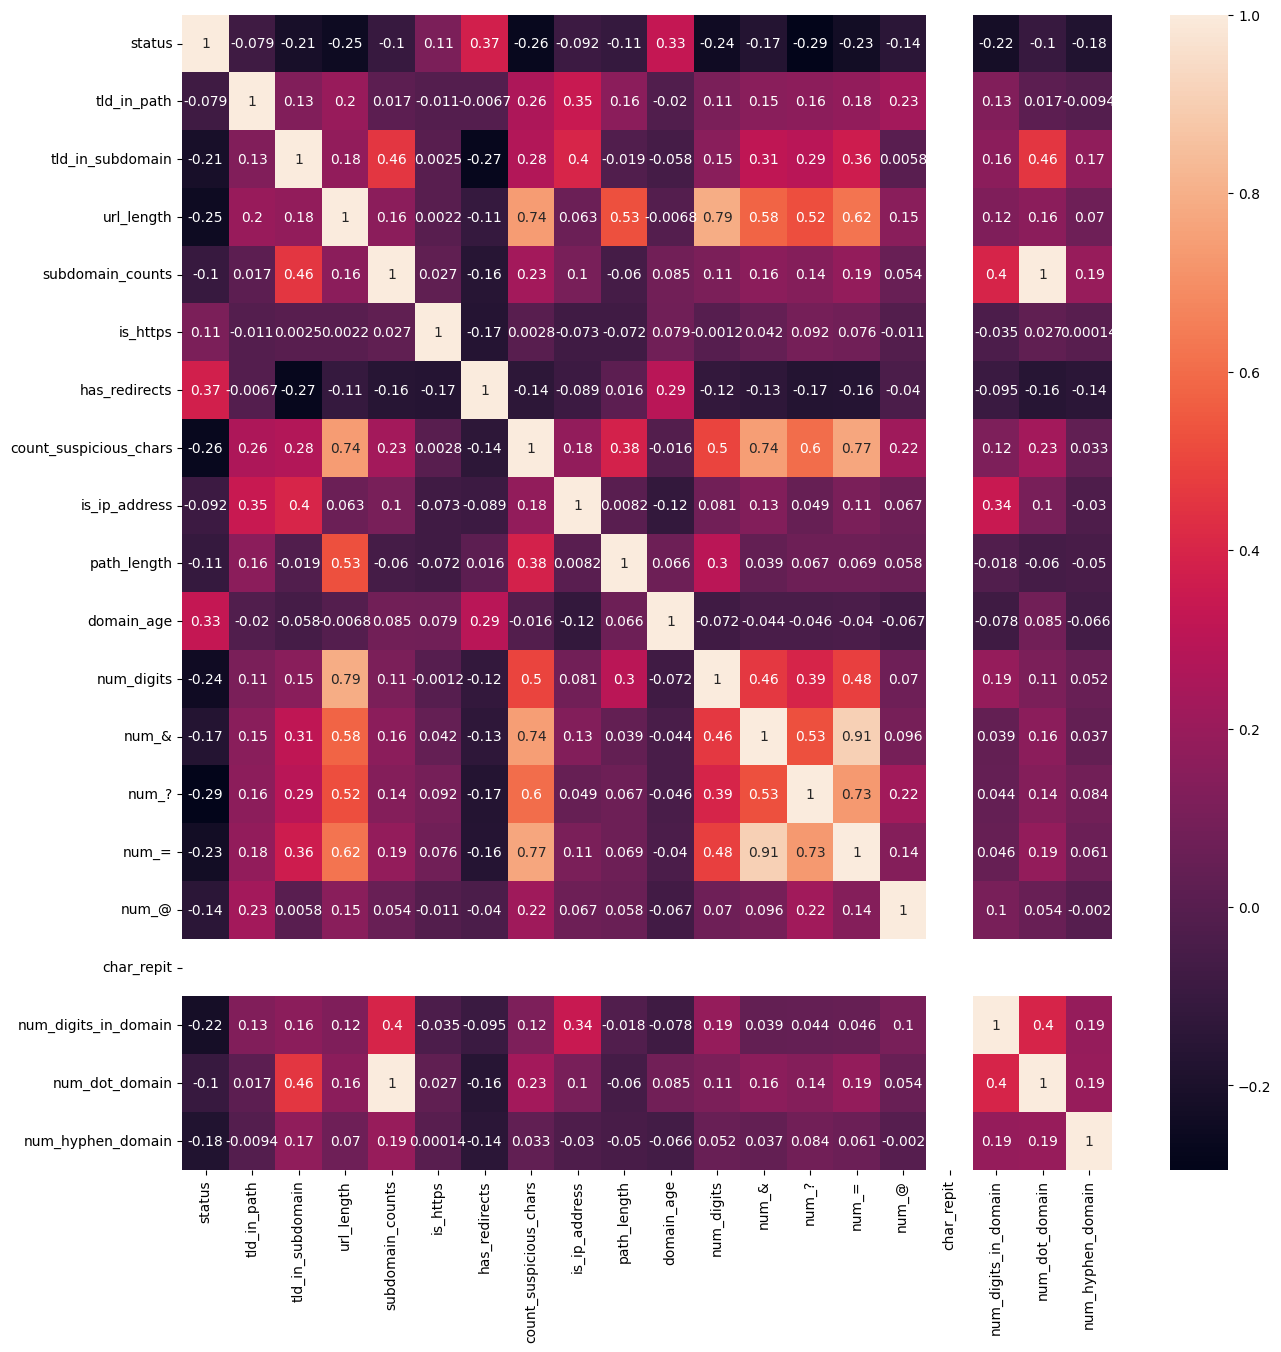

In [ ]:
corr = df.corr()
plt.figure(figsize = (15,15))
shs.heatmap(corr, annot = True)

In [ ]:
df.to_csv("newdata.csv")